# Exploratory Data Analysis

This is a small exploratory notebook to take a first look at the data and the relations between the features

-----------


First import the needed libraries

In [1]:
import keras, ROOT, sklearn
print keras.__version__
import flat_helper
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# from keras_tqdm import TQDMNotebookCallback # uncomment this to get the progress bar
#import theano
#theano.config.gcc.cxxflags = '-march=corei7' 

## For plotting stuff
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # cosmetics
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA

Using TensorFlow backend.


Welcome to JupyROOT 6.12/06
2.1.1


Then load the data

In [2]:
dfQuarks = flat_helper.GetJetShapesFast('/eos/user/c/cbeiraod/DataScienceSchool/Data Challenge/quarks_standard', 20000, recompute=False)
dfGluons = flat_helper.GetJetShapesFast('/eos/user/c/cbeiraod/DataScienceSchool/Data Challenge/gluons_standard', 20000, recompute=False)

dfQuarksModified = flat_helper.GetJetShapesFast('/eos/user/c/cbeiraod/DataScienceSchool/Data Challenge/quarks_modified', 20000, recompute=False)
dfGluonsModified = flat_helper.GetJetShapesFast('/eos/user/c/cbeiraod/DataScienceSchool/Data Challenge/gluons_modified', 20000, recompute=False)

dfQuarks['isGluon'] = 0
dfGluons['isGluon'] = 1

dfQuarksModified['isGluon'] = 0
dfGluonsModified['isGluon'] = 1

inputData = pd.concat([dfQuarks, dfGluons])
inputDataTest = pd.concat([dfQuarksModified, dfGluonsModified])

seed = 42
inputDataTrain, inputDataValidation = train_test_split(inputData, random_state=seed)

labels = inputData.isGluon
inputData = inputData.drop('isGluon',axis=1)

labelsTrain = inputDataTrain.isGluon
inputDataTrain = inputDataTrain.drop('isGluon',axis=1)

labelsValidation = inputDataValidation.isGluon
inputDataValidation = inputDataValidation.drop('isGluon',axis=1)

labelsTest = inputDataTest.isGluon
inputDataTest = inputDataTest.drop('isGluon',axis=1)

Loading from root file _eos_user_c_cbeiraod_DataScienceSchool_Data Challenge_quarks_standard_shapes.root
Loading from root file _eos_user_c_cbeiraod_DataScienceSchool_Data Challenge_gluons_standard_shapes.root
Loading from root file _eos_user_c_cbeiraod_DataScienceSchool_Data Challenge_quarks_modified_shapes.root
Loading from root file _eos_user_c_cbeiraod_DataScienceSchool_Data Challenge_gluons_modified_shapes.root


## Exploration

Take a look at the information such as which branches, how many entries and the data type

In [ ]:
print "Shape: ", dfQuarks.shape
dfQuarks.info()

#print "Shape: ", dfGluons.shape
#dfGluons.info()

Look at the first "nevt" events for quarks and gluons, see some values of the features

In [ ]:
nevt=6
dfQuarks.head(nevt)

In [ ]:
dfGluons.head(nevt)
# As an alternative, we can look at the last "nevt" events
#dfGluons.tail(nevt)
# Or randomly sample:
#dfGluons.sample(nevt)

Now we will ask for a description of the datasets, this will give us some statistical information of each feature (mean, min, max, etc)

In [ ]:
dfQuarks.describe()

In [ ]:
dfGluons.describe()

Test some assumptions on the data

In [ ]:
dfQuarks.query('mass < 2.5')

In [ ]:
dfQuarks.query('radial == dispersion')


### Visualization

Box plot of the stat information

In [ ]:
dfQuarks.drop('isGluon',axis=1).plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.6)
plt.suptitle("Quarks")
plt.show()
dfGluons.drop('isGluon',axis=1).plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.6)
plt.suptitle("Gluons")
plt.show()

Plot some 1D histograms

In [ ]:
fig, ax = plt.subplots(1,2)

ax[0].hist(dfQuarks.mass, 30, alpha=0.5, label="Quarks")
ax[0].hist(dfGluons.mass, 30, alpha=0.5, label="Gluons")
ax[1].hist(dfQuarks.radial, 30, alpha=0.5, label="Quarks")
ax[1].hist(dfGluons.radial, 30, alpha=0.5, label="Gluons")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_xlabel("Jet mass")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Jet radial xxxx")
ax[1].set_ylabel("Frequency")

ax[0].legend()
ax[1].legend()

plt.show()

Or plot all at the same time

In [ ]:
dfQuarks.drop('isGluon',axis=1).hist()
plt.subplots_adjust(hspace=0.45, wspace=1)
plt.suptitle("Quarks")
plt.show()
dfGluons.drop('isGluon',axis=1).hist()
plt.subplots_adjust(hspace=0.45, wspace=1)
plt.suptitle("Gluons")
plt.show()

Plot some 2D scatter plots

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0].scatter(dfQuarks.mass, dfQuarks.radial)
ax[1].scatter(dfGluons.mass, dfGluons.radial)

ax[0].set_title("Quarks")
ax[1].set_title("Gluons")
ax[0].set_xlabel("Jet mass")
ax[1].set_xlabel("Jet mass")
ax[0].set_ylabel("Jet radial xxxx")
ax[1].set_ylabel("Jet radial xxxx")
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Jet mass vs radial xxxx")

plt.show()

Or plot all combinations simultaneously

In [ ]:
scatter_matrix(dfQuarks.drop('isGluon',axis=1))
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.suptitle("Quarks")
plt.show()
scatter_matrix(dfGluons.drop('isGluon',axis=1))
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.suptitle("Gluons")
plt.show()

Remove outliers

In [ ]:
dfQuarks = dfQuarks.drop(dfQuarks.query('dispersion == 0').index.get_values())
dfGluons = dfGluons.drop(dfGluons.query('dispersion == 0').index.get_values())

inputData = pd.concat([dfQuarks, dfGluons])

inputDataTrain, inputDataValidation = train_test_split(inputData, random_state=42)

labels = inputData.isGluon
inputData = inputData.drop('isGluon',axis=1)

labelsTrain = inputDataTrain.isGluon
inputDataTrain = inputDataTrain.drop('isGluon',axis=1)

labelsValidation = inputDataValidation.isGluon
inputDataValidation = inputDataValidation.drop('isGluon',axis=1)

Get the correlation matrix

In [ ]:
corrQuarks = dfQuarks.drop('isGluon',axis=1).corr()
sns.heatmap(corrQuarks,
            xticklabels=corrQuarks.columns.values,
            yticklabels=corrQuarks.columns.values)
sns.plt.show()

In [ ]:
corrGluons = dfGluons.drop('isGluon',axis=1).corr()
sns.heatmap(corrGluons,
            xticklabels=corrGluons.columns.values,
            yticklabels=corrGluons.columns.values)
sns.plt.show()

#### Dimensionality Reduction

Start with PCA to only two dimensions

In [7]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(inputData)
print "Shape: ", reduced_data.shape

Shape:  (40000, 2)


/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


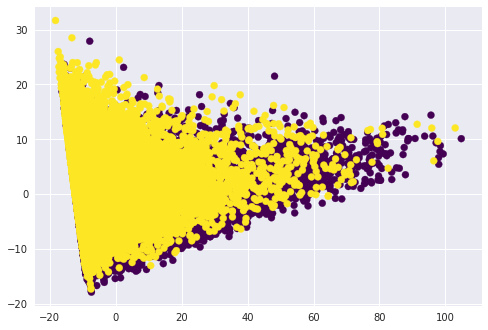

In [8]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels, cmap='viridis')

plt.show()

## Support Vector Machine

In [10]:
from sklearn import svm
from sklearn.metrics import classification_report

nIn = len(inputDataTrain.columns)

XTrain = inputDataTrain.loc[:,:]
YTrain = np.ravel(labelsTrain)
XVal = inputDataValidation.loc[:,:]
YVal = np.ravel(labelsTest)
XTest= inputDataTest.loc[:,:]
YTest= np.ravel(labelsTest)

clf = svm.SVC()

clf.fit(XTrain, YTrain)

YPred = clf.predict(XTest)

#print(classification_report(YTest, YPred, target_names=target_names))
from sklearn.metrics import roc_curve, roc_auc_score
print roc_auc_score(YPred, YTest)

#fprDev, tprDev, _Dev = roc_curve(YPred, YTest)


0.710051646805


## Basic Neural Network

In [6]:
from keras.models import Sequential
from keras.layers import Dense

nIn = len(inputDataTrain.columns)

XTrain = inputDataTrain.loc[:,:]
YTrain = np.ravel(labelsTrain)
XVal = inputDataValidation.loc[:,:]
YVal = np.ravel(labelsTest)
XTest= inputDataTest.loc[:,:]
YTest= np.ravel(labelsTest)


neurons = nIn + 3 
# create model
model = Sequential()
model.add(Dense(neurons,input_dim=nIn, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(neurons, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_normal'))
# Compile model          
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(XTrain, YTrain, validation_data=(XVal, YVal), epochs=10, batch_size=50, verbose=2)
# calculate predictions
#predictions = model.predict(XTrain)
# round predictions
#rounded = [round(x[0]) for x in predictions]
#print(rounded)

ValueError: could not broadcast input array from shape (9,1) into shape (9)

## Deep Belief Neural Network

## Ideas on decorrelating the input variables

In [ ]:
import scipy.linalg as la

print corrGluons
#print numpy.sqrt(corrGluons,dtype='complex128') # This is doing the square root of individual matrix elements
print la.cholesky(corrGluons)
print la.inv(la.cholesky(corrGluons))

dfGluonsDecorr = dfGluons.drop('isGluon',axis=1).dot(la.inv(la.cholesky(corrGluons).T))

dfGluonsDecorr.corr()


## Compare all ML Methods using ROC curves